In [1]:
import warnings
warnings.filterwarnings("ignore")

from StreetCLIP_Predict import franco_predict


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [2]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import time, os


geolocator = Nominatim(user_agent="myGeocoder")

def get_city(latitude, longitude):

    # Use reverse geocoding to get location information
    location = geolocator.reverse((latitude, longitude), language="en")

    # Parse the location information to extract the arrondissement
    address = location.raw.get("address")
    city = address.get("city")
    town = address.get("town")
    village = address.get("village")
    time.sleep(0.5)
    if city:
        return city
    elif town:
        return town
    return village


import matplotlib.pyplot as plt
import random
from PIL import Image

validation_folder = ".\\test_pictures"


filenames = os.listdir(validation_folder)
filenames = sorted(filenames, reverse=True)

def comparison():
    for filename in filenames:
        if filename.endswith('.jpg') and random.uniform(0,1) > 0.01:

            lat_str, lon_str = filename[:-4].split(',')
            latitude = float(lat_str)
            longitude = float(lon_str)

            unimage = Image.open(os.path.join(validation_folder, filename))

            prediction = franco_predict(unimage)

            # Retrieve actual location
            actual_location_name = get_city(latitude, longitude)
            

            predicted_coordinates = geolocator.geocode(prediction)
            predicted_latitude = predicted_coordinates.latitude
            predicted_longitude = predicted_coordinates.longitude


            distance = geodesic((latitude, longitude),(predicted_latitude, predicted_longitude)).kilometers

            # Display the image with predicted and actual location information
            plt.figure(figsize=(6, 6))
            plt.imshow(unimage)
            plt.title(f"Predicted: ({predicted_latitude:.4f},{predicted_longitude:.4f}) in {prediction} \nActual: ({latitude:.4f},{longitude:.4f}) in {actual_location_name}\n Difference: {distance:.2f}km")
            plt.axis('off')
            plt.show()
    return ''

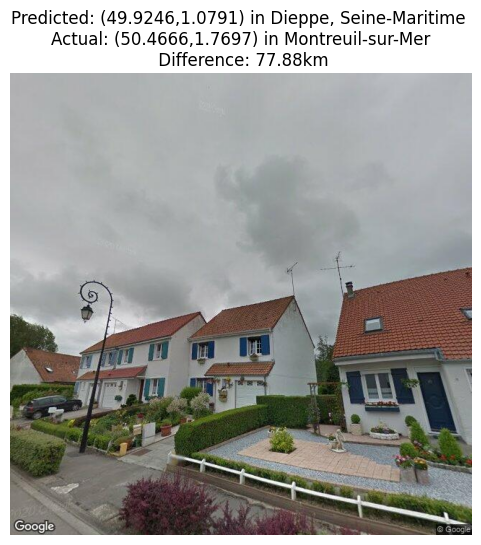

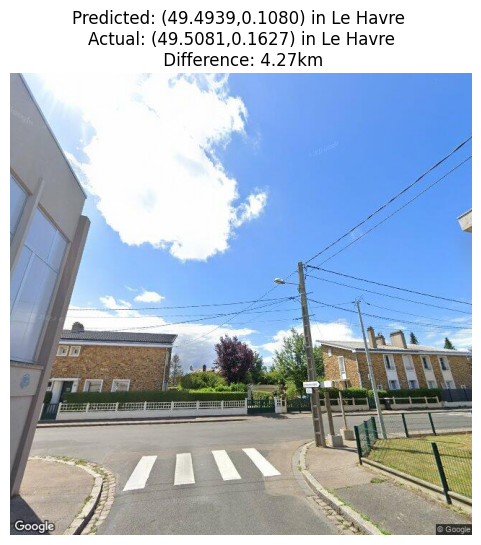

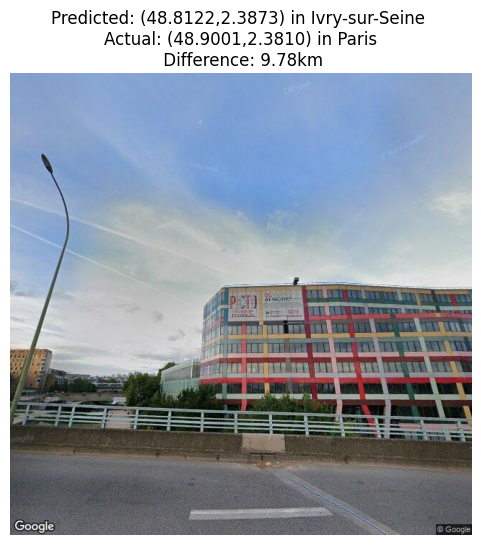

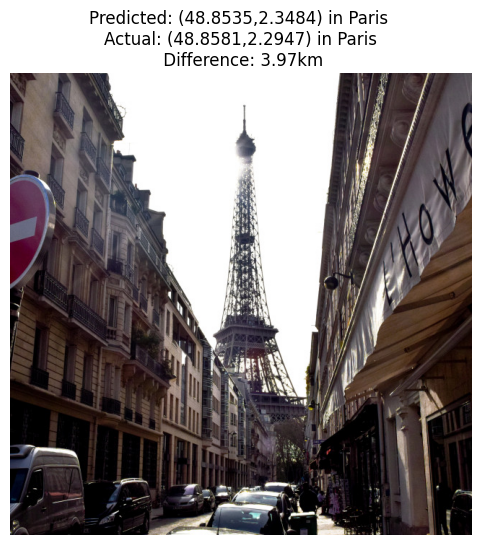

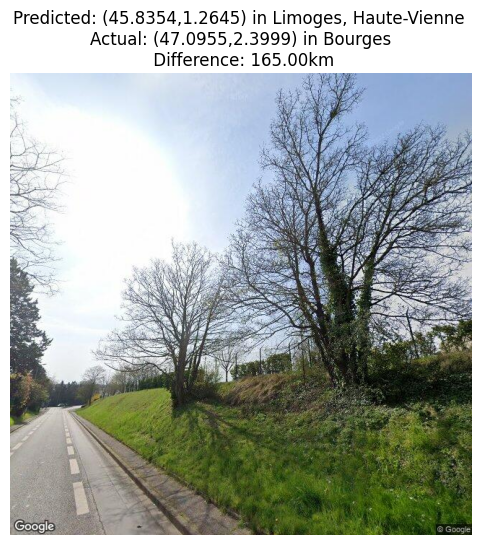

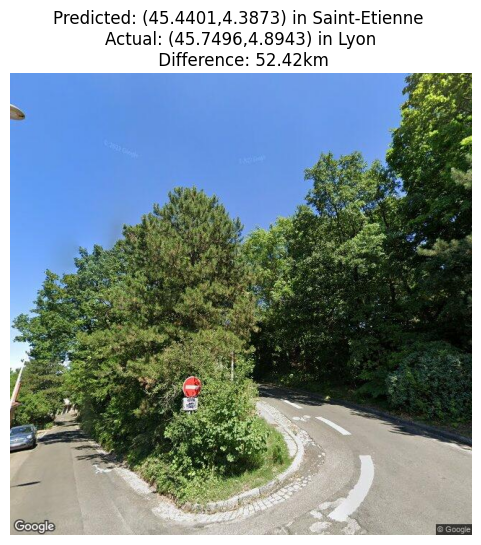

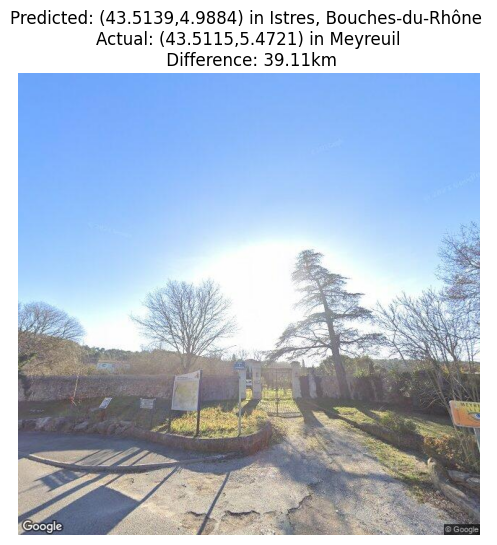

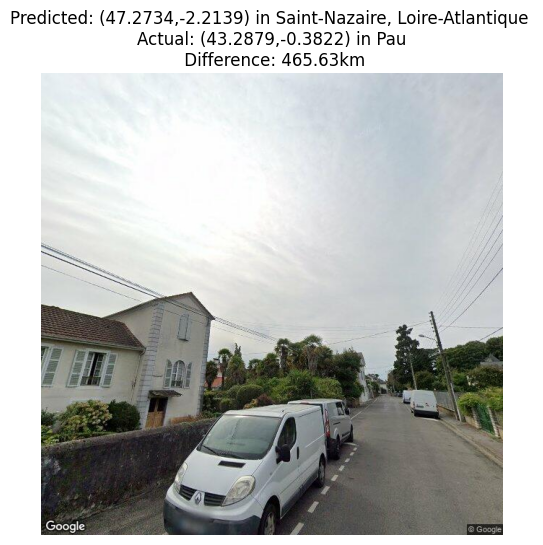

In [3]:
print(comparison())